In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LSTM
from tensorflow.keras.optimizers import  Adam, SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import export_graphviz
#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier


2023-12-27 13:29:14.970369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 13:29:15.031527: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 13:29:15.048886: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 13:29:15.366674: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df 

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
#Revisar valores nulos
df_nulls = df.isnull().sum()
df_nulls

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [5]:
# Eliminar filas con valores faltantes
df = df.dropna()
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [6]:
# Eliminar las columnas 'Artist Name' y 'Track Name'
df = df.drop(['Track Name'], axis=1)
df

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Boston,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [7]:
# Estandarización de los datos
le = LabelEncoder()
df['Artist Name'] = le.fit_transform(df['Artist Name'])
valores_numericos = df.columns.drop(['key', 'mode', 'time_signature', 'Class','Artist Name'])

scaler = StandardScaler()

df[valores_numericos] = scaler.fit_transform(df[valores_numericos])

df.head()





,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,789,0.657863,-0.861080,0.593013,3.0,0.232529,1,-0.450090,-0.748501,-0.575982,-0.589070,0.404232,-0.220004,0.334812,4,10
2,5786,-0.488940,-0.547837,-0.232364,6.0,-0.027879,1,-0.274522,0.770948,-0.588537,1.245203,1.295395,0.841069,-0.891468,4,6
4,4597,0.597505,-2.156218,1.257441,2.0,0.928601,1,2.137688,-0.751419,-0.536186,-0.144588,-1.546515,2.586894,0.146873,4,10
5,5834,0.597505,-1.746593,1.265694,6.0,2.145018,1,0.529548,-0.740887,-0.569300,-0.144588,-0.936600,1.020174,-0.041532,4,6
6,5158,0.295715,0.897898,-0.050781,5.0,-0.337585,0,0.485287,0.513999,-0.589178,-0.607225,0.845726,0.691934,1.005103,4,2


Random Forest

In [8]:
# Separar target y features
X = df.drop(['Class'], axis=1)
y = df['Class']

In [9]:
X

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,789,0.657863,-0.861080,0.593013,3.0,0.232529,1,-0.450090,-0.748501,-0.575982,-0.589070,0.404232,-0.220004,0.334812,4
2,5786,-0.488940,-0.547837,-0.232364,6.0,-0.027879,1,-0.274522,0.770948,-0.588537,1.245203,1.295395,0.841069,-0.891468,4
4,4597,0.597505,-2.156218,1.257441,2.0,0.928601,1,2.137688,-0.751419,-0.536186,-0.144588,-1.546515,2.586894,0.146873,4
5,5834,0.597505,-1.746593,1.265694,6.0,2.145018,1,0.529548,-0.740887,-0.569300,-0.144588,-0.936600,1.020174,-0.041532,4
6,5158,0.295715,0.897898,-0.050781,5.0,-0.337585,0,0.485287,0.513999,-0.589178,-0.607225,0.845726,0.691934,1.005103,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,2215,-0.488940,-2.162242,-2.316438,7.0,-2.095575,0,-0.439762,2.359649,2.123160,-0.605347,-1.198226,1.653379,-0.168273,3
17992,3707,-0.971804,0.681038,-1.845974,11.0,-0.461892,0,-0.563692,1.936622,-0.589129,-0.780010,-0.552337,-1.695999,0.380854,4
17993,5124,-0.549298,0.199126,1.282202,4.0,0.833307,0,0.001370,-0.751855,-0.588734,2.948009,-0.850754,-0.609204,0.028290,4
17994,568,-0.851088,-1.867071,0.555871,6.0,-1.071162,0,0.927895,-0.747906,2.425994,0.381279,-0.470579,0.286594,0.058251,4


In [10]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
rf_model = RandomForestClassifier(n_estimators=256, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [12]:
#score
rf_model.score(X_test, y_test)

0.4638171815488785

In [13]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

In [14]:
dtc_model.score(X_test, y_test)

0.3351671603893356

In [15]:
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)
y_train_t = to_categorical(y_train)
y_test_t = to_categorical(y_test)

In [ ]:
num_epochs = 555
learning_rate = 5e-3

In [ ]:
model_block = Sequential()
model_block.add(InputLayer(input_shape=(X_train_t.shape[1],)))
model_block.add(Dense(256, activation='relu'))
model_block.add(Dropout(0.5))
model_block.add(Dense(128, activation='relu'))
model_block.add(Dropout(0.3))
model_block.add(Dense(32, activation='relu'))
model_block.add(Dropout(0.2))

model_block.add(Dense(y_train_t.shape[1], activation='softmax'))
model_block.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
model_fit = model_block.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


In [21]:
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(X_train_t.shape[1],1)))
#model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train_t.shape[1], activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate, momentum=0.8),metrics=['accuracy'])
model_lstm.summary()
model_lstm_fit = model_lstm.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 11)                363       
                                                                 
Total params: 301,579
Trainable params: 301,579
Non-tr

In [23]:
sub = pd.read_csv('submission.csv')
genero_labels = {}
for columna in sub.columns:
    split = columna.rsplit('_', 1)
    genero_labels[int(split[1])] = split[0]
genero_labels

{0: 'Acoustic/Folk',
 1: 'Alt_Music',
 2: 'Blues',
 3: 'Bollywood',
 4: 'Country',
 5: 'HipHop',
 6: 'Indie Alt',
 7: 'Instrumental',
 8: 'Metal',
 9: 'Pop',
 10: 'Rock'}

In [24]:

#Mostrar métricas
y_test_labeled = y_test.map(genero_labels)
y_pred_labeled = pd.Series(y_pred).map(genero_labels)

classification_metrics_labeled = classification_report(y_test_labeled, y_pred_labeled, output_dict=True)
classification_metrics_labeled_df = pd.DataFrame(classification_metrics_labeled).transpose()
classification_metrics_labeled_df


,precision,recall,f1-score,support
Acoustic/Folk,0.575000,0.575000,0.575000,80.000000
Alt_Music,0.075000,0.090517,0.082031,232.000000
Blues,0.323529,0.370787,0.345550,178.000000
Bollywood,0.589286,0.622642,0.605505,53.000000
Country,0.303030,0.370370,0.333333,27.000000
HipHop,0.367089,0.322222,0.343195,90.000000
Indie Alt,0.201923,0.211055,0.206388,398.000000
Instrumental,0.931034,0.890110,0.910112,91.000000
Metal,0.455108,0.486755,0.470400,302.000000
Pop,0.262376,0.234513,0.247664,226.000000


In [36]:
def cm(y_test, modelo):
    y_test_labeled = y_test.map(genero_labels)
    y_pred = modelo.predict(X_test)
    y_pred_labeled = pd.Series(y_pred).map(genero_labels)
    cm = confusion_matrix(y_test_labeled, y_pred_labeled)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genero_labels.values())
    disp.plot()
    plt.title(modelo)
    plt.xticks(rotation=90)
    plt.show()

def cm_bloques(y_test_t, model):
    predictions = model.predict(X_test_t)
    predictions = np.argmax(predictions, axis=1)
    real_y = np.argmax(y_test_t, axis=1)
    cm = confusion_matrix(real_y, predictions,)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genero_labels.values())
    disp.plot()
    plt.title(f'Modelo {model.name}')
    plt.xticks(rotation=90)
    plt.show()

def graficos(model_fit):
    #grafico perdida vs epoch
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['loss'])
    plt.plot(model_fit.epoch, model_fit.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Entrenamiento")
    plt.legend(['loss', 'val_loss'])
    plt.show()

    #Grafico accuracy vs val_accuracy
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['accuracy'])
    plt.plot(model_fit.epoch, model_fit.history['val_accuracy'])
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

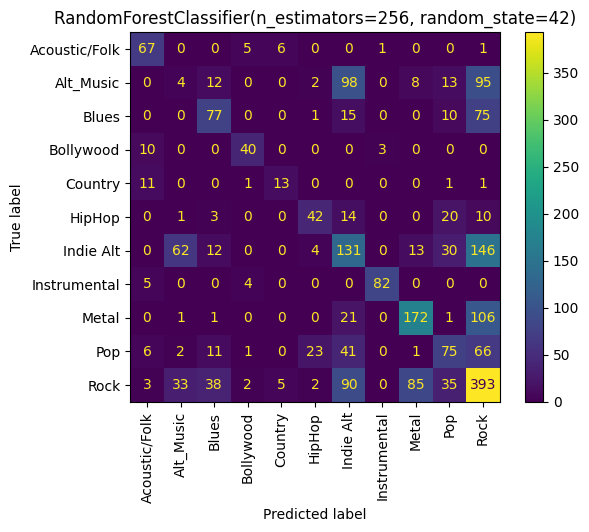

In [26]:
cm(y_test, rf_model)

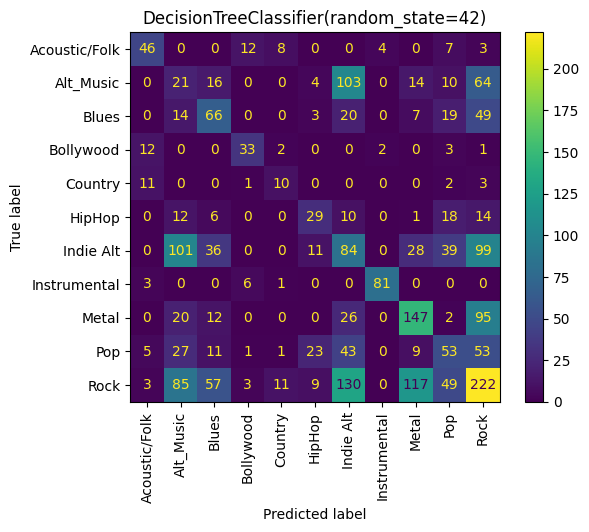

In [27]:
cm(y_test, dtc_model)

74/74 [==============================] - 0s 482us/step


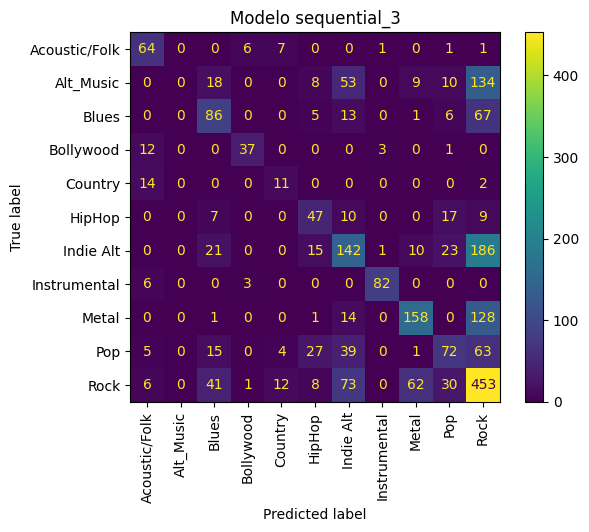

In [32]:
cm_bloques(y_test_t, model_block)

74/74 [==============================] - 0s 2ms/step


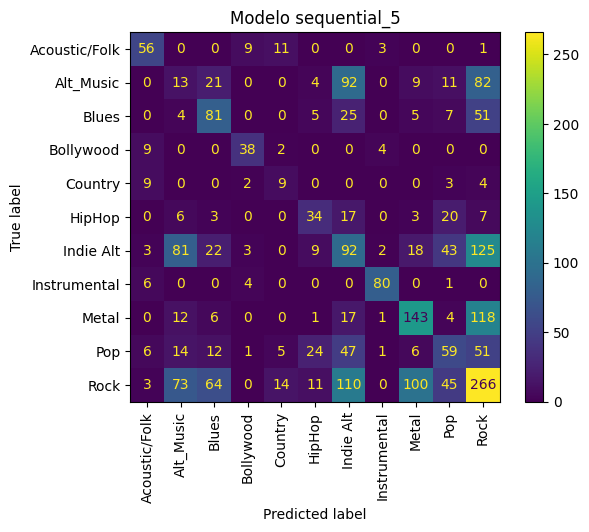

In [33]:
cm_bloques(y_test_t, model_lstm)

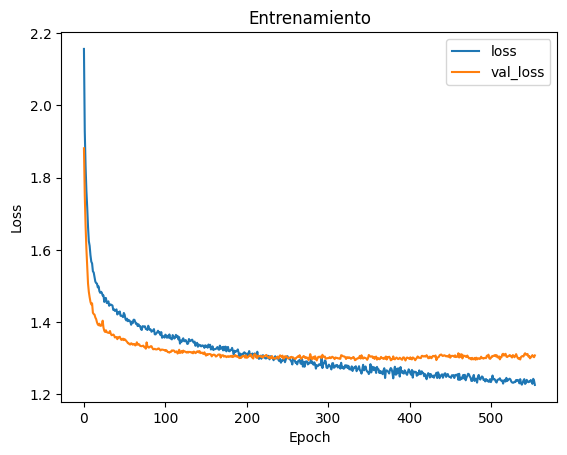

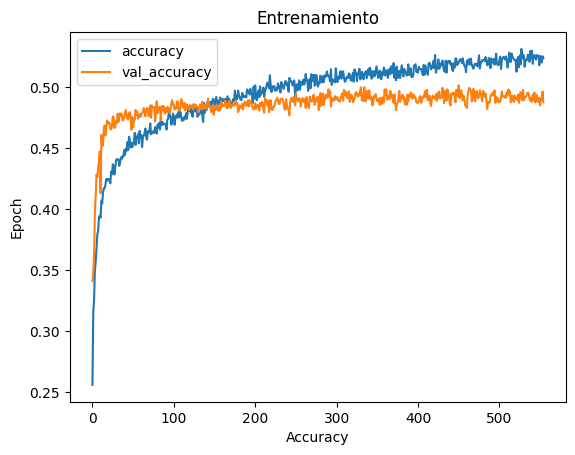

In [37]:
graficos(model_fit)

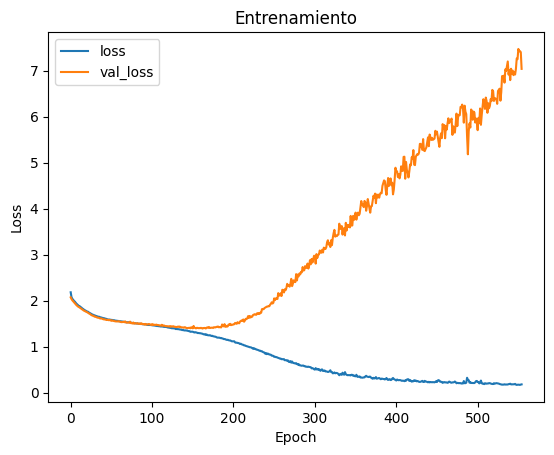

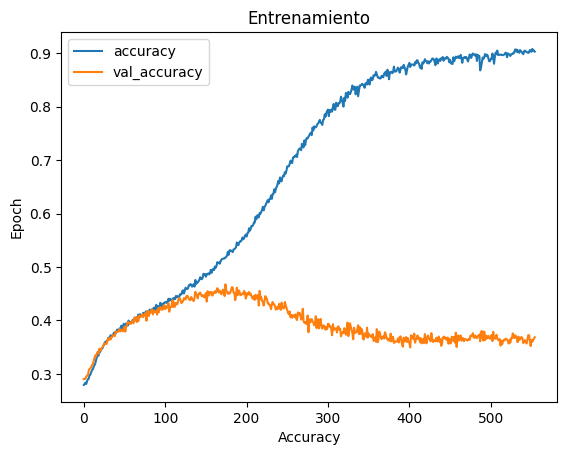

In [38]:
graficos(model_lstm_fit)